# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

## Anuradha Rajkumar 
## June 6, 2023

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [84]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [85]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [88]:
# Write your code here
print('The data frame has',df.shape[0],'rows and',df.shape[1],'columns')
df.shape

The data frame has 1898 rows and 9 columns


(1898, 9)

#### Observations:
The dataframe has 1896 rows and 9 columns 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are int64 which are ID numbers and times, type object for ones that include strings, float for costs of order

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [94]:
# Write your code here
df.isna().sum()
#df.isnull()


# can also see in the non-null count of .info()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
No Null values found

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe()


# minimum, average, and maximum time it takes for food to be prepared once an order is placed


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [8]:
# minimum time it takes for food to be prepared once an order is placed

df.food_preparation_time.min()

20

In [9]:
# average time it takes for food to be prepared once an order is placed

df.food_preparation_time.mean()

27.371970495258168

In [10]:
# maximum time it takes for food to be prepared once an order is placed

df.food_preparation_time.max()

35

#### Observations:
The min prep time is 20 and the max is 35 mins, average time is 27.37

### **Question 5:** How many orders are not rated? [1 mark]

In [100]:
# Write the code here

NotR = df[df["rating"] == 'Not given']

NotR['rating'].value_counts()

Not given    736
Name: rating, dtype: int64

In [96]:
(df['rating']=='Not given').sum()


# two different ways of getting this 

736

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<AxesSubplot:xlabel='food_preparation_time', ylabel='count'>

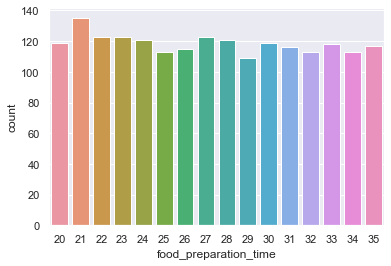

In [101]:
# Write the code here

sns.countplot(x ='food_preparation_time', data = df)


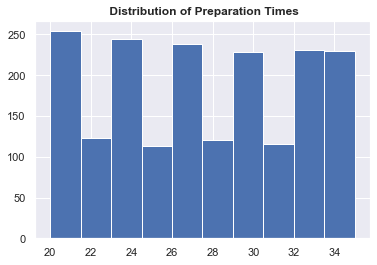

In [113]:
plt.hist(df['food_preparation_time'])
plt.title(' Distribution of Preparation Times',
          fontweight = "bold")

plt.show()


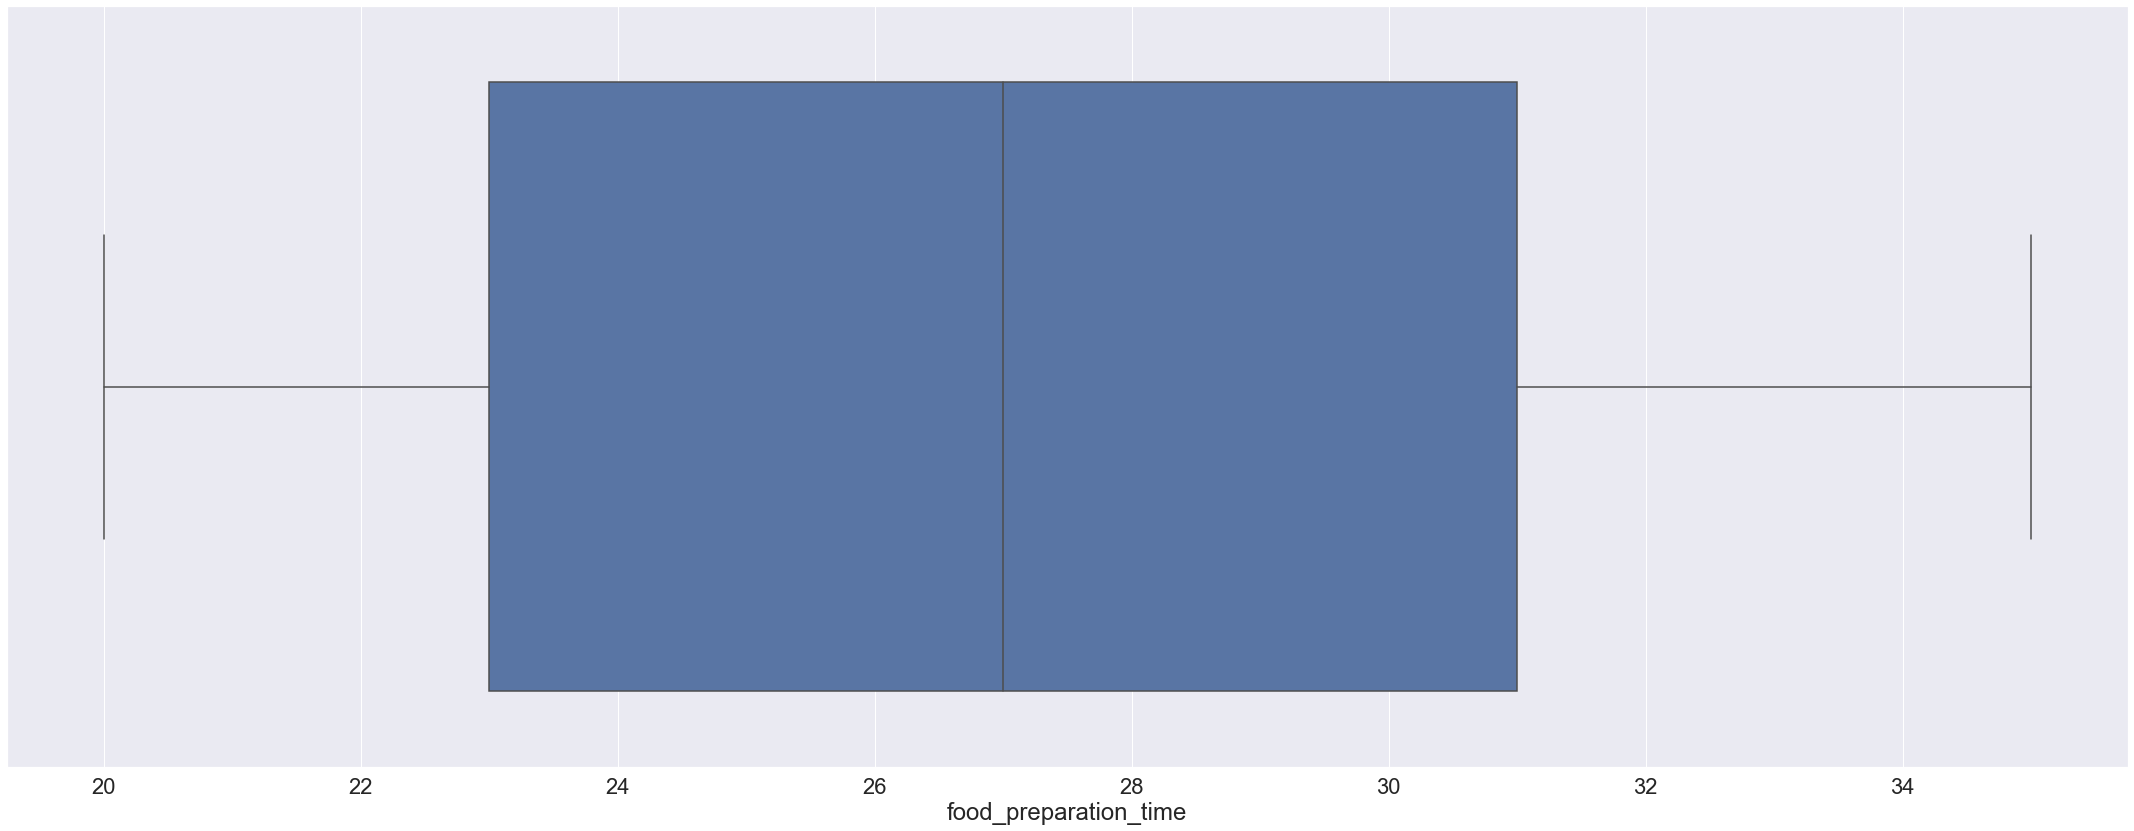

In [178]:
sns.boxplot(x='food_preparation_time', data=df)

plt.show()

<AxesSubplot:xlabel='delivery_time', ylabel='count'>

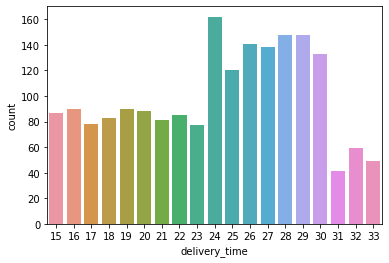

In [14]:
sns.countplot(x ='delivery_time', data = df)

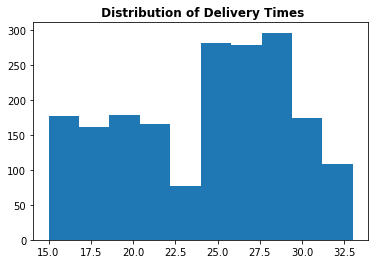

In [16]:
plt.hist(df['delivery_time'])
plt.title(' Distribution of Delivery Times',
          fontweight = "bold")

plt.show()

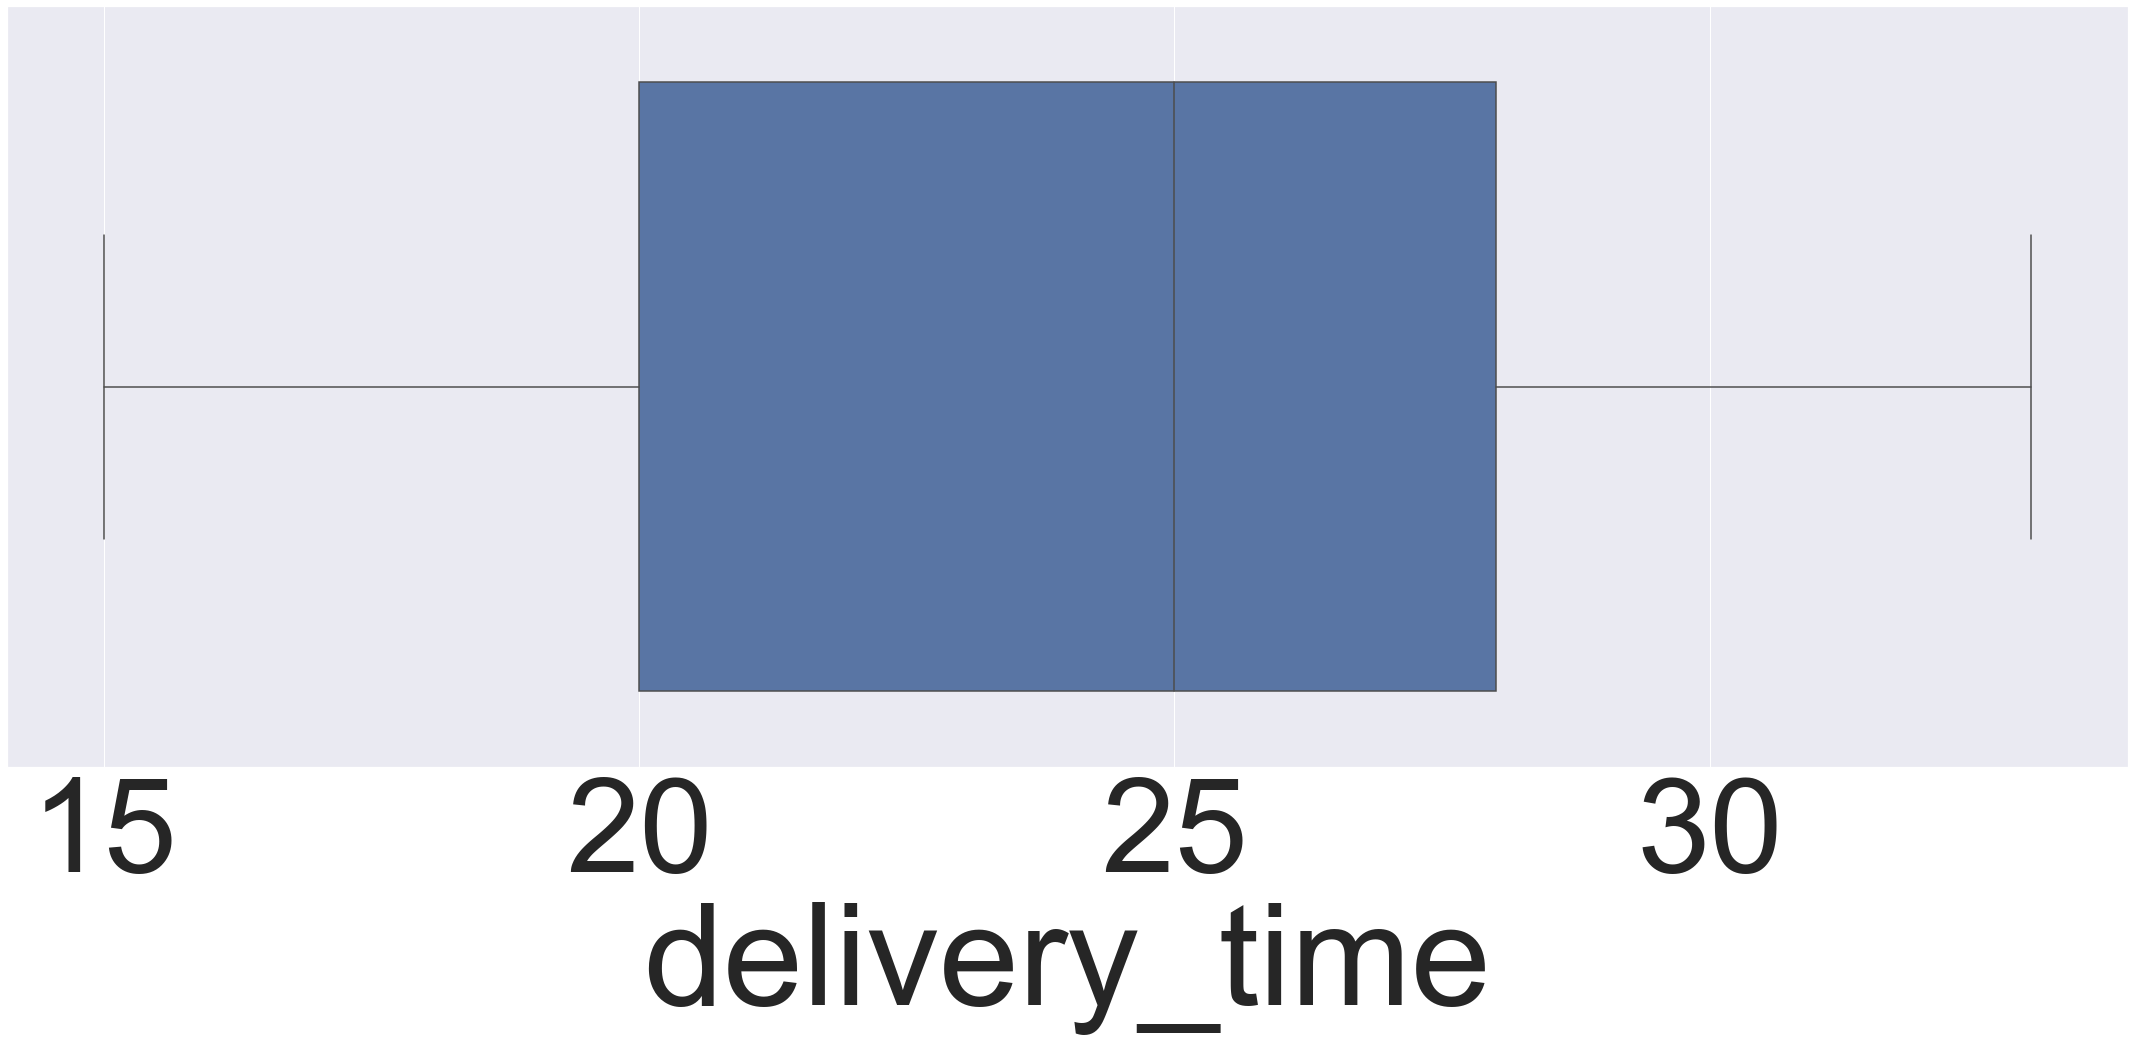

In [116]:
sns.boxplot(x='delivery_time', data=df)

plt.show()

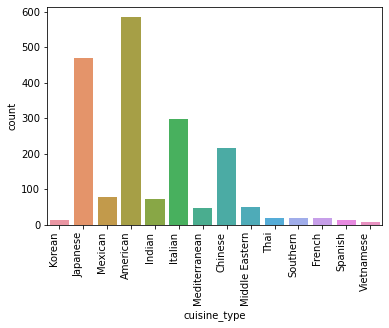

In [17]:
# count plot on single categorical variable
ax = sns.countplot(x = 'cuisine_type', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Show the plot
plt.show()


<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

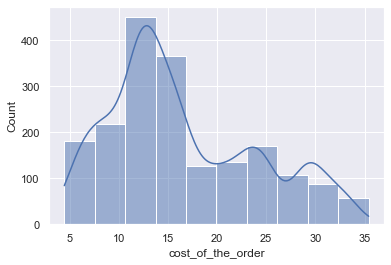

In [108]:
sns.histplot(data= df, x='cost_of_the_order', bins =10, kde=True)

# plot using sns.histplot() with a distribution plot

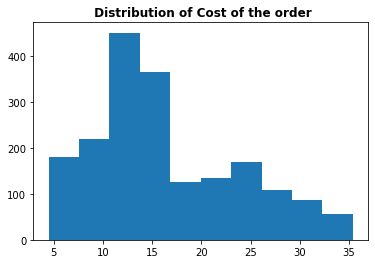

In [15]:
plt.hist(df['cost_of_the_order'])

 
plt.title(' Distribution of Cost of the order',
          fontweight = "bold")
plt.show()

#plot using plt.hist()

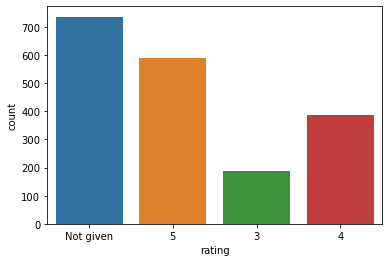

In [18]:
# count plot on single categorical variable
sns.countplot(x = 'rating', data = df)

# Show the plot
plt.show()


In [19]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
Top 5 Restaurants respectively:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm  

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
df.groupby(["day_of_the_week", "cuisine_type"]).size()


day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

#### Observations:
American on weekends (415 total)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [138]:
# Write the code here
#total_order_over_D20 =(df[df["cost_of_the_order"] >= 20].value_counts()).size
#total_order_over_D20

df.shape[0]

1898

In [139]:
total_order_over_D20= (df[df["cost_of_the_order"] >= 20].value_counts()).sum()
total_order_over_D20

555

In [140]:
 (total_order_over_D20/df.shape[0])* 100 

29.24130663856691

#### Observations:
29.24% of orders cost over $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
Mean is 24.16 mins for delivery time

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [141]:
# Write the code here
df["customer_id"].value_counts().head(3)



# counted the number of times customer ID showed up 

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

Customer ID   orders total
52832          13
47440          10
83287          9

These customers should get 20% discount vouchers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [27]:
# Write the code here

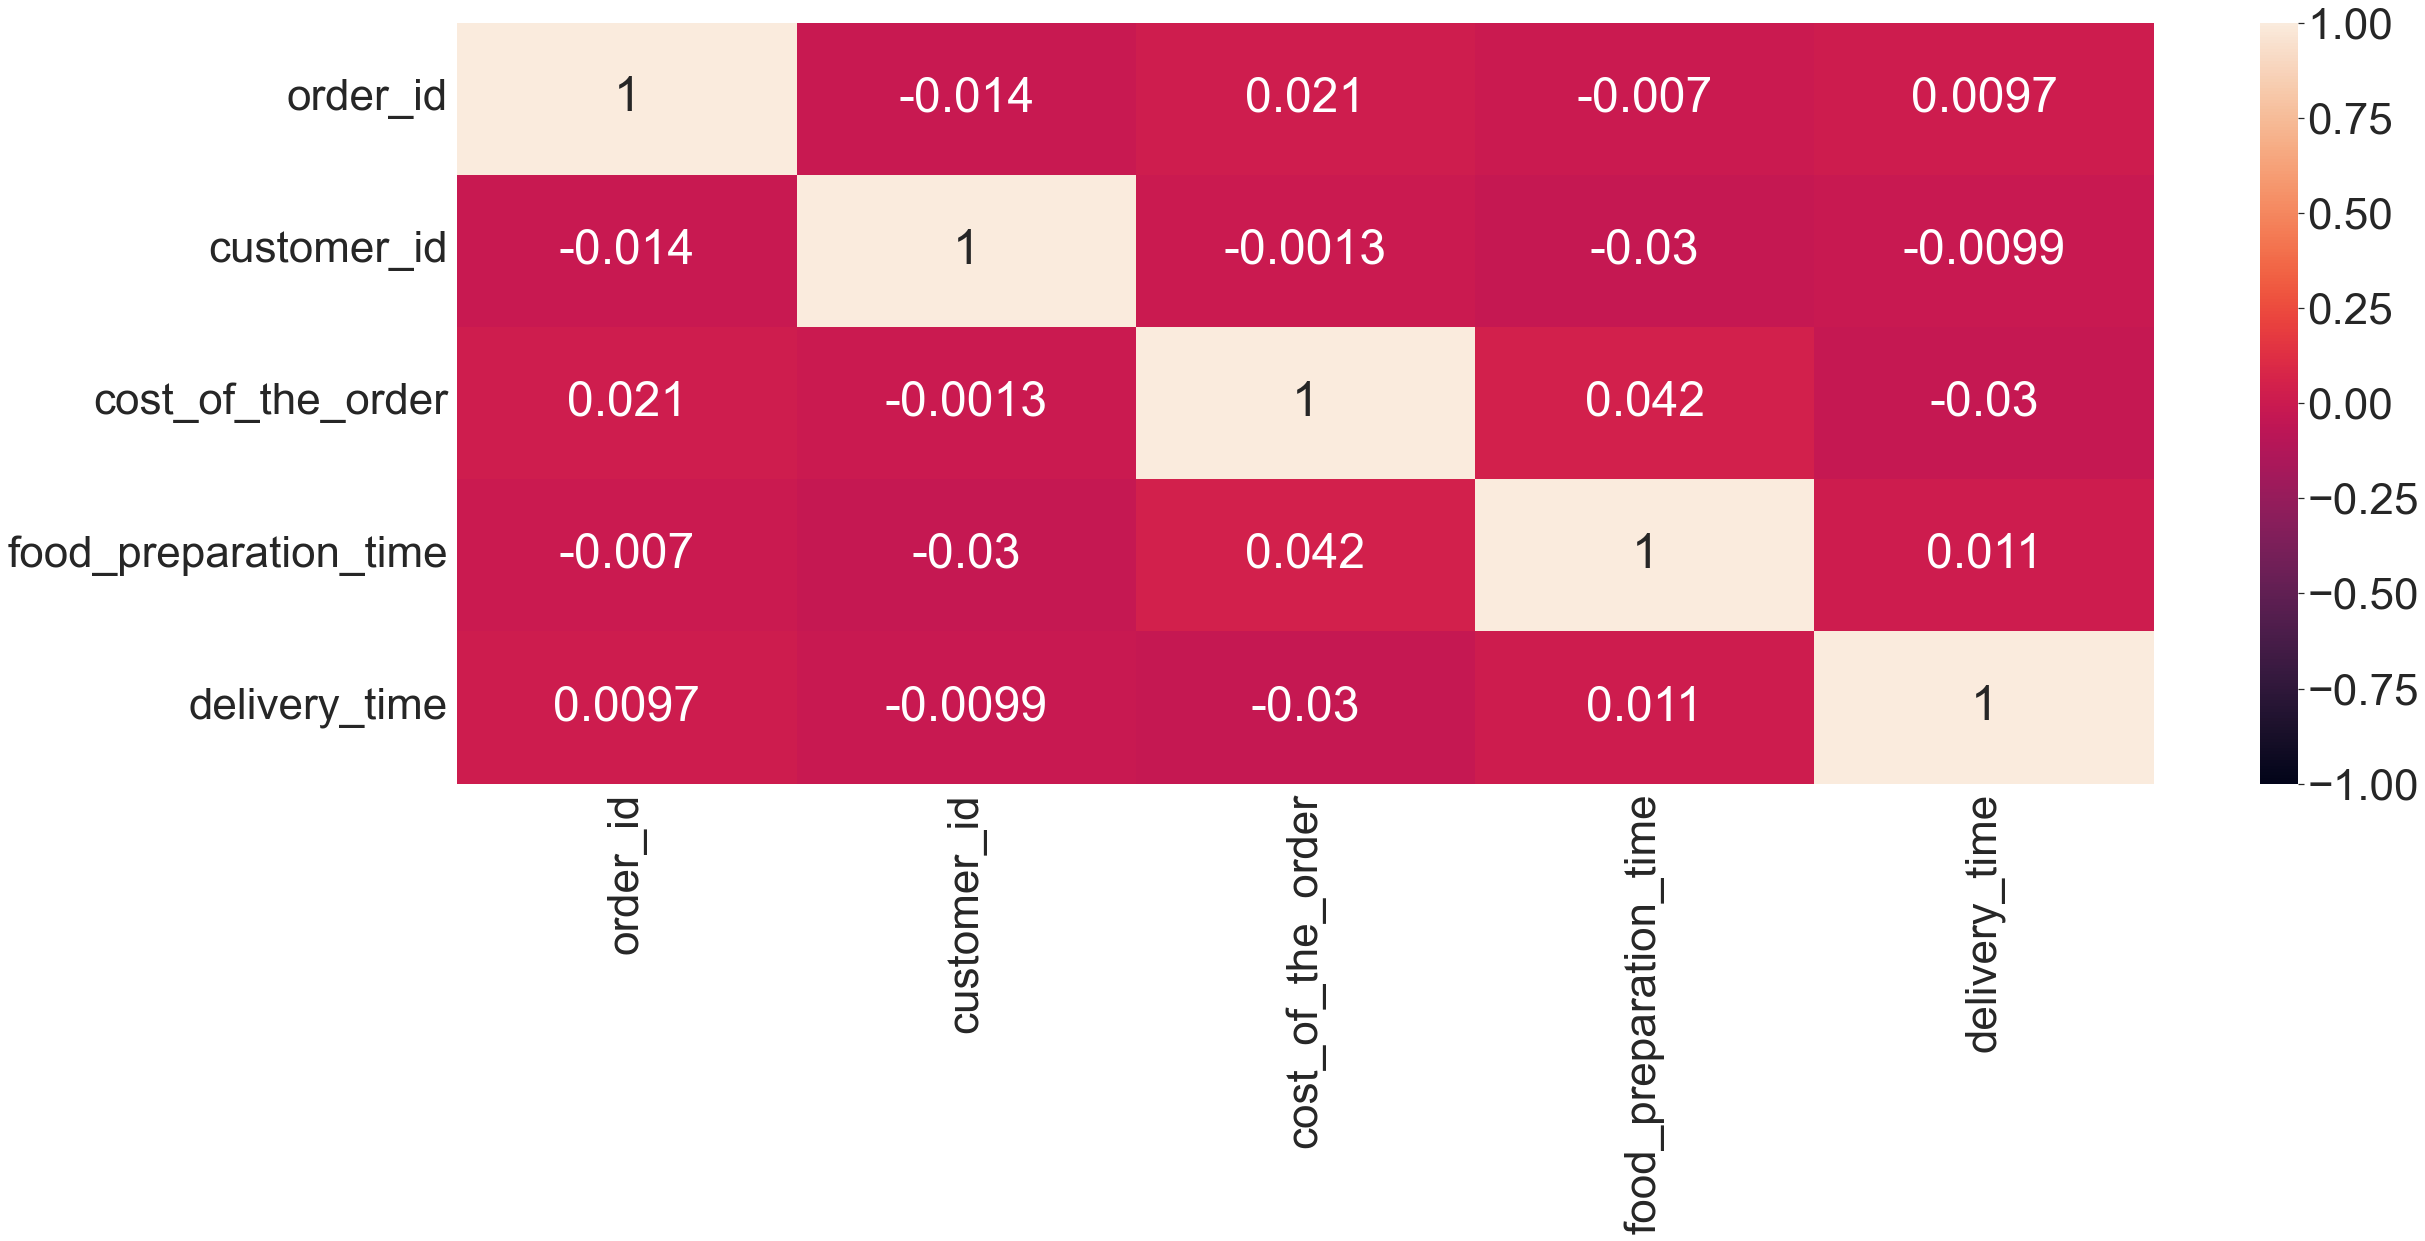

In [147]:
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1  )
sns.set(rc={"figure.figsize": (38, 14)}, font_scale=4)
plt.show()


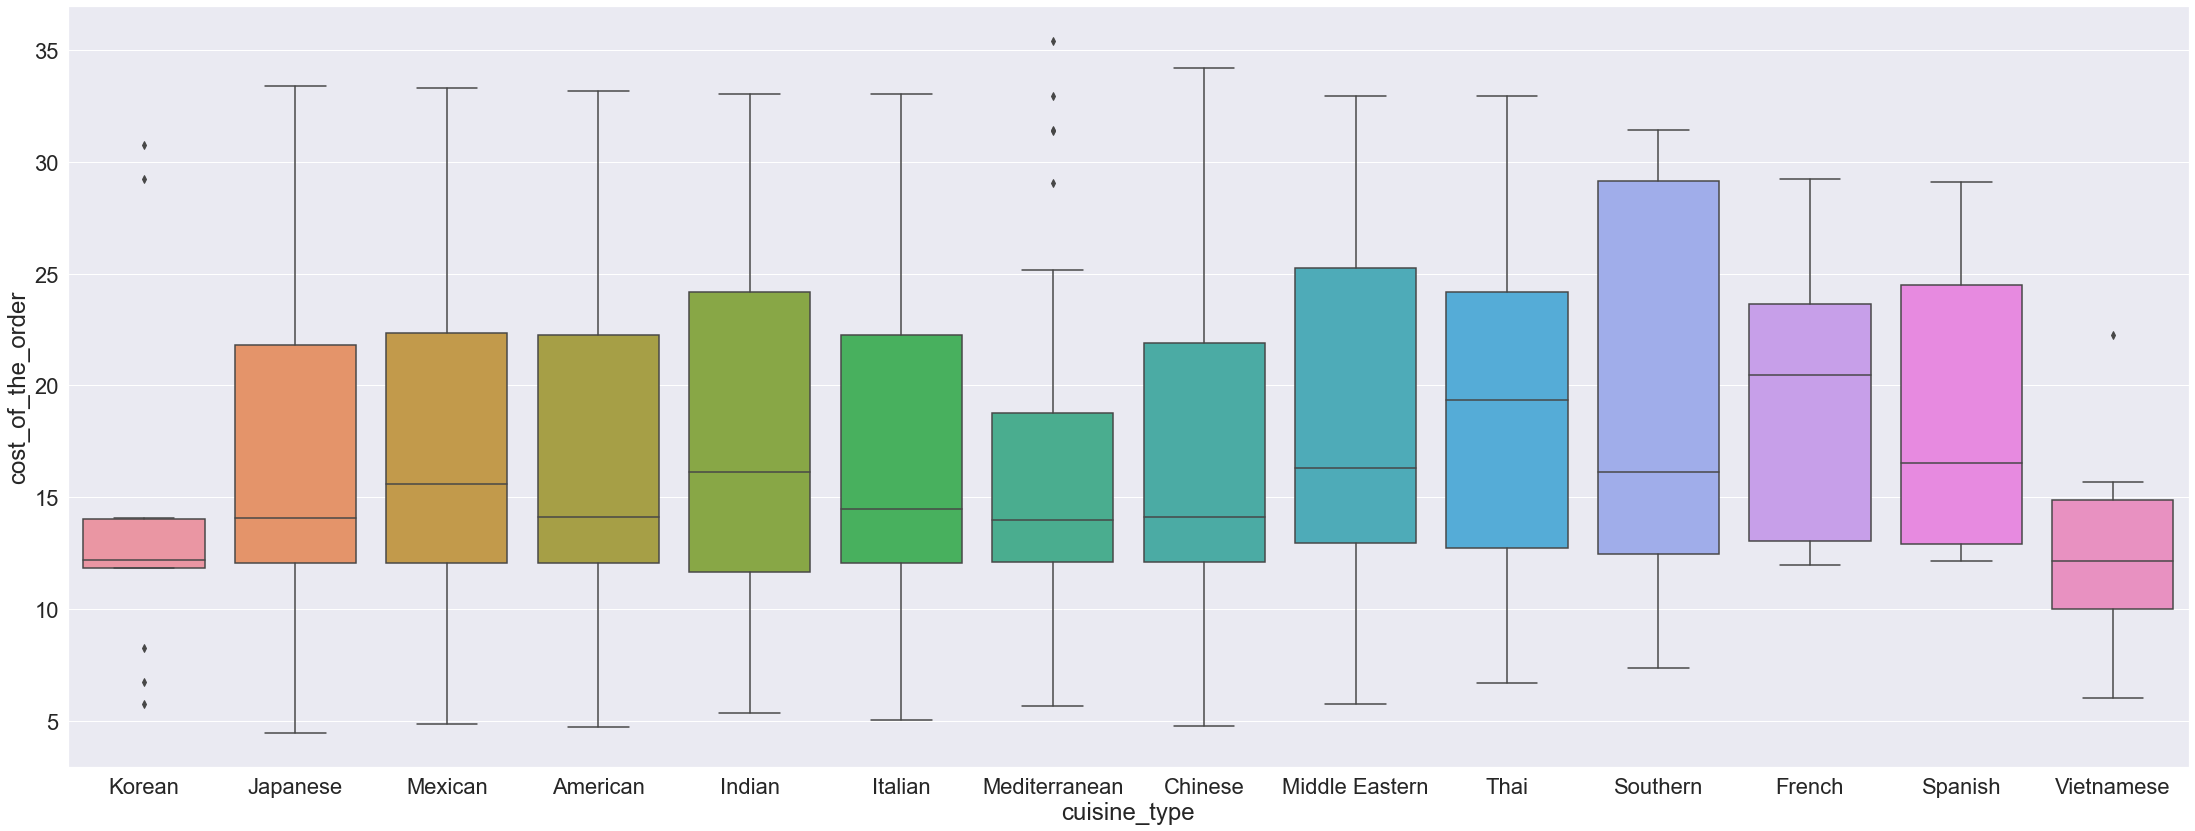

In [171]:
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
#sns.set(rc={"figure.figsize": (38, 14)}, font_scale=2)

plt.show()

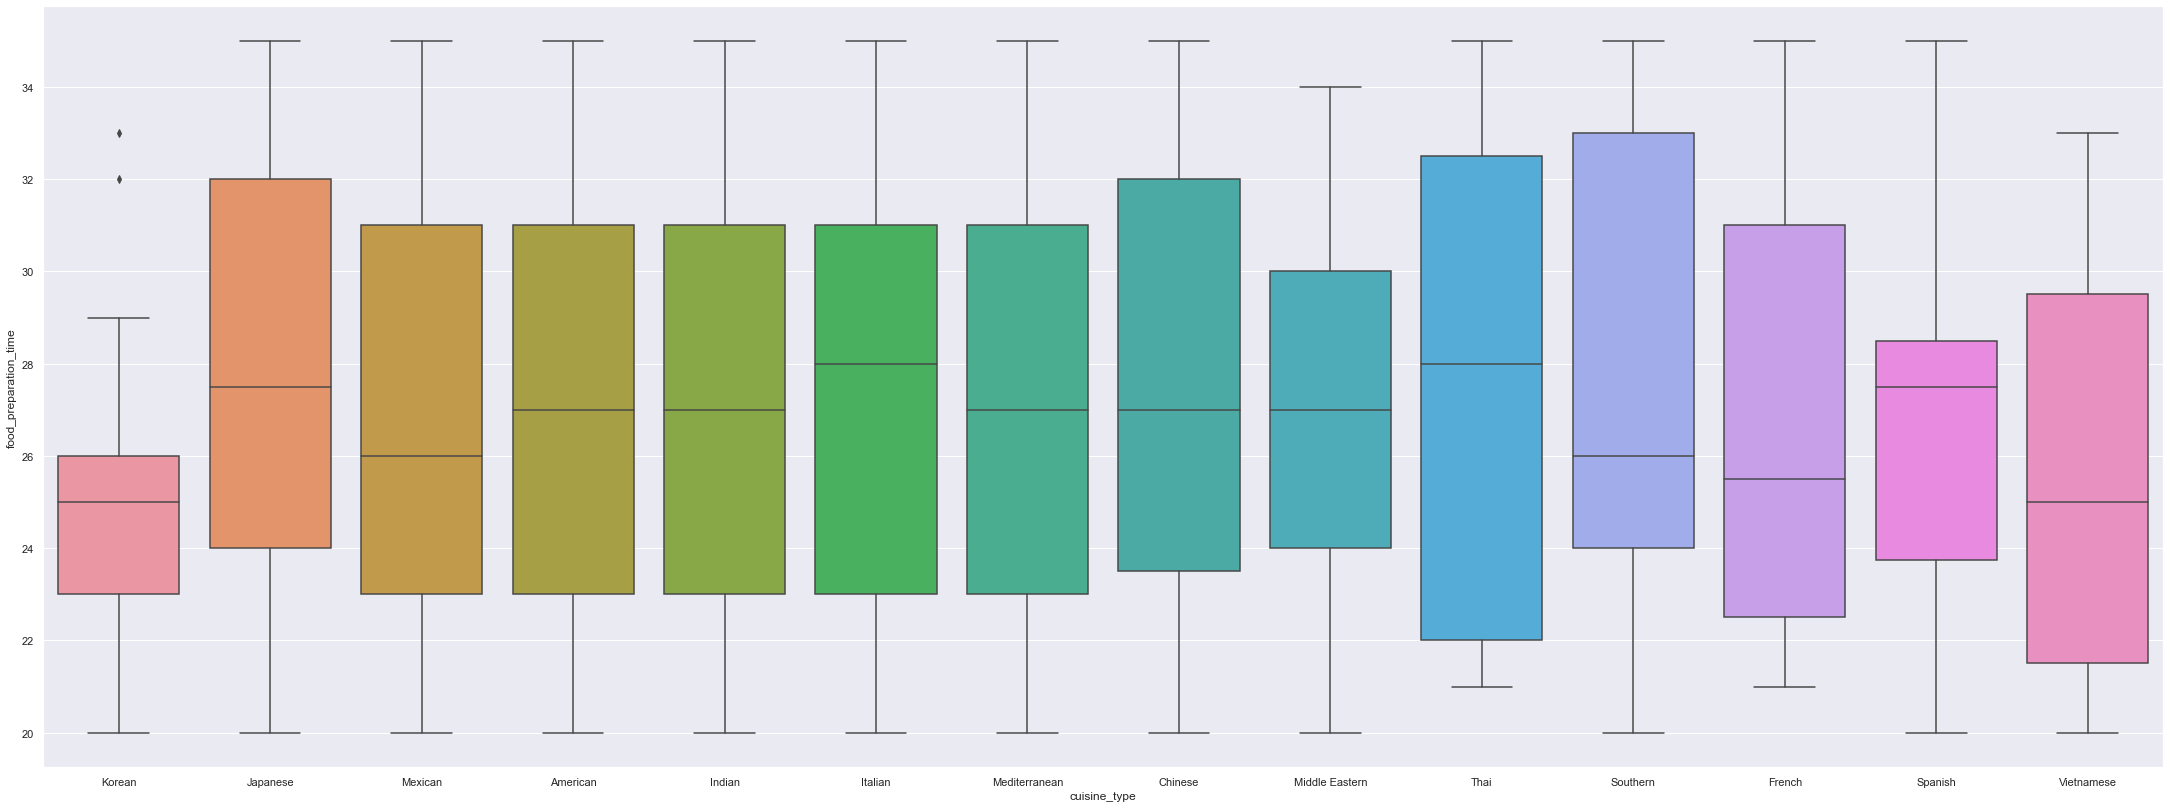

In [78]:
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
sns.set(rc={"figure.figsize": (38, 14)})

plt.show()

#not that useful

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

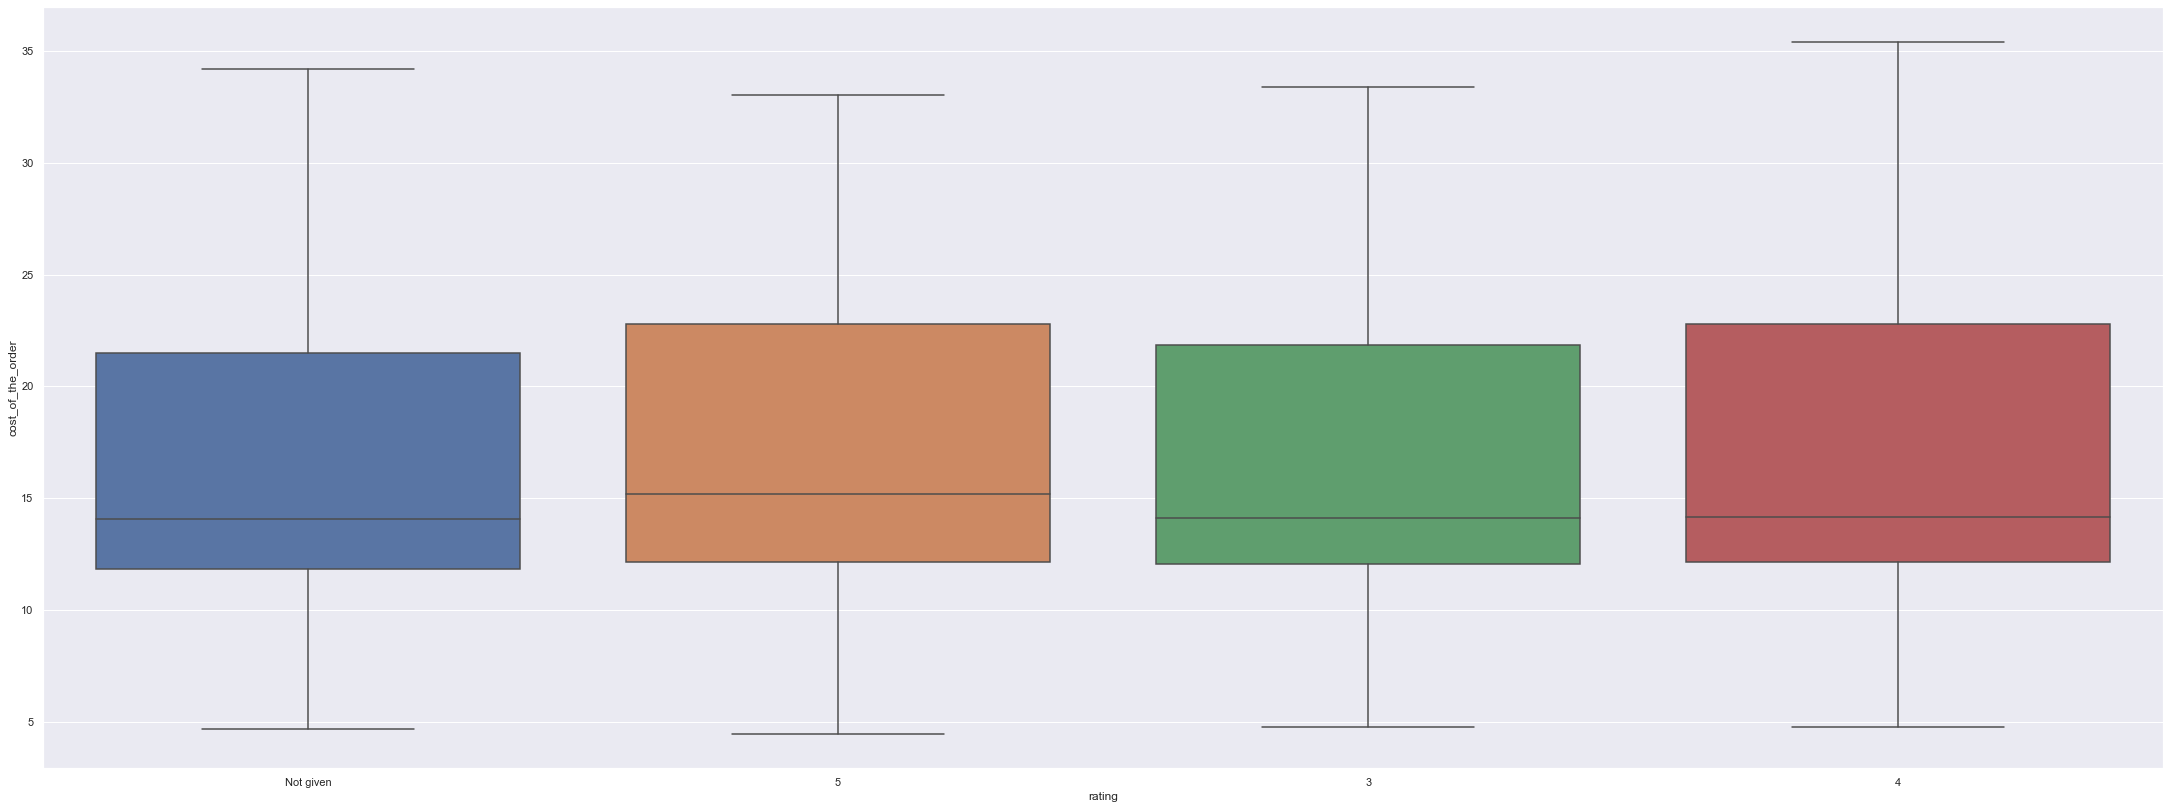

In [30]:
sns.boxplot( x = "rating", y = "cost_of_the_order", data = df)


In [79]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)


restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

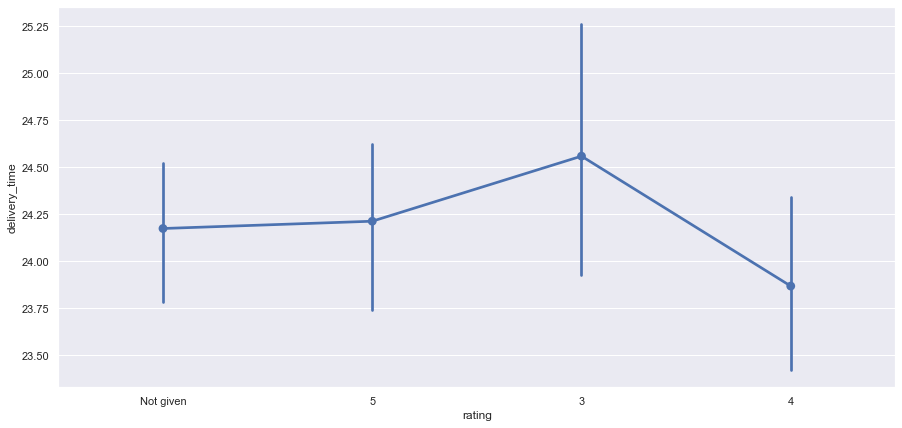

In [80]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

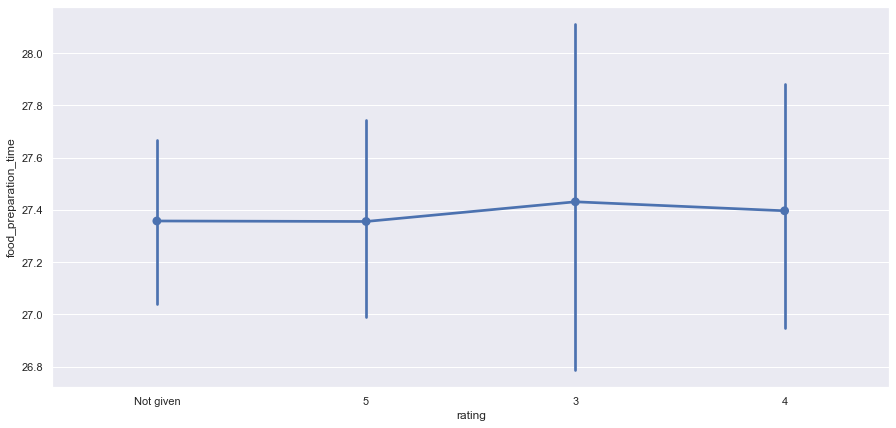

In [81]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

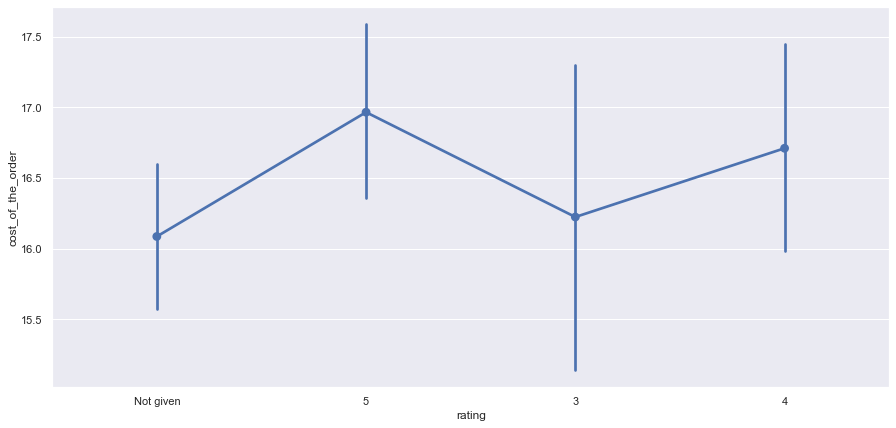

In [83]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [160]:
# Write the code here


R = df[df["rating"] != 'Not given'].copy() # df frame with not given removed 

# converting from type obj to int
R['rating'] = R['rating'].astype('int')  

df_rated = R.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

df_rated.head()

# used the low code version for help 


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [177]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rated[df_rated['rating']>50]['restaurant_name'] # Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
avg4_rest = R[R['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
avg4_rest.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
	These are the restaurants that get promotional offer
    
    The Meatball Shop	
	Blue Ribbon Fried Chicken	
	Shake Shack	
	Blue Ribbon Sushi	

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [164]:
# Write the code here

#function to determine the net revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()


# used the low code version for help 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [174]:
df['Revenue'].sort_values(ascending = False)

# max revenue is $8.8

573     8.8525
1646    8.5475
1762    8.3425
1831    8.3425
1370    8.3300
         ...  
1569    0.0000
889     0.0000
624     0.0000
542     0.0000
1695    0.0000
Name: Revenue, Length: 1898, dtype: float64

#### Observations:
Net revenue column created 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [165]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()


over60 = df[df['total_time'] > 60].value_counts().sum()

In [166]:
perc_over60 = (over60/df.shape[0]) * 100
perc_over60

10.537407797681771

In [63]:
df.shape[0]

1898

#### Observations:
10.53% of orders take more than 60 mins

In [179]:
736/1898

0.38777660695468913

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [73]:
# Write the code here


wday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
wday

28.340036563071298

In [72]:
wend= df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
wend

22.4700222057735

#### Observations:
Weekend mean delivery time is 22 mins and weekday mean time is 28 mins

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


* French and Thai cuisines are the most expensive, and are not that popular while ordering. American and Chinese are most popular on weekdays and weekends, but there are about 2.5x more American food orders on weekends compared to weekdays 

* There is a slight correlation between food prep time and cost of the order  

* Several Restaurants ( 736/1898 = 38%)  did not have ratings provided, this is not good for the success of the resturants and the app




### Recommendations:

*   Since we know that American and Chinese foods are the most popular, the app can have additional sales on weekends to promote these foods, like a 'Happy Hour' or 'Free Delivery Hour', through these they can increase app usage and revenue 

* Maximum revenue an order made was $8.8, by adding vouchers and promoting restaurants within the app by collaborating with the marketing team, the revenue can be increased. Restaurants can increase their revenue by adding combo meals within restaurants, and also provide vouchers in the Foodhub app to increase revenue for the app.

* Push notifications for ratings on the app, so that buisnesses can improve and more users are attracted to these restaurants 
* Improving delivery times will also improve ratings for the restaurants ( as seen by line plot above)

* Resturants should aim to reduce prep and delivery times so that clients to improve overall service



---